Basado en https://pythonplotscience.blogspot.com/2017/08/a-simple-advertising-adstock.html

In [252]:
import numpy as np
import pandas as pd
from math import log, atan, tanh
import math
import matplotlib.pyplot as plt

# Define Adstock Rate
adstock_rate = 0.50

# Create Data
advertising = [117.913, 120.112, 125.828, 115.354, 177.090, 141.647, 137.892, 0.000, 0.000, 0.000, 0.000, 
               0.000, 0.000,   0.000,   0.000,   0.000,   0.000, 158.511, 109.385, 91.084, 79.253, 102.706, 
               78.494, 135.114, 114.549, 87.337, 107.829, 125.020, 82.956, 60.813, 83.149, 0.000, 0.000, 
               0.000, 0.000, 0.000, 0.000, 129.515, 105.486, 111.494, 107.099, 0.000, 0.000, 0.000, 
               0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000]


In [2]:
def adstocked_advertising(adstock_rate=0.5, advertising=advertising):
    
    adstocked_advertising = []
    for i in range(len(advertising)):
        if i == 0: 
            adstocked_advertising.append(advertising[i])
        else:
            adstocked_advertising.append(advertising[i] + adstock_rate * adstocked_advertising[i-1])            
    return adstocked_advertising

In [159]:
def lag_log_adstocked_advertising(adstock_rate=0.5,log_scale=1,log_base=math.e, advertising=advertising, lag=0):
    
   #si hay REZAGO debemos actualizar nuestra lista 
    
    if lag>0:
        
        advertising_aux =  []    
        
        for i in range(len(advertising)):
            if i < lag:
                advertising_aux.append(0)
            else: 
                advertising_aux.append(advertising[i-lag])
        
        advertising = advertising_aux
   
        
    #Calculo del Adstock: A_t = lambda*A_{t-1} + X_t
    
    adstocked_advertising = []
    
    for i in range(len(advertising)):
        if i == 0: 
            adstocked_advertising.append(advertising[i])
        else:
            adstocked_advertising.append(advertising[i] + adstock_rate * adstocked_advertising[i-1]) 
        
    #Aplicación de la Ley de los Rendimemntos Decrecientes:
    
    #* Suavizamos con log, pero se podría usar otra función
    #* Se debe multiplicar por un log_scale si hay valores para que todos los valores sean mayores a 1, luego se le suma 1
    #  ya que, un logaritmo entre 0 y 1 es negativo.
    #* la función puede usar un log en cualquier base definida si se pone un valor <=1 no se aplica el logaritmo ni el escaldao
    
    if log_base >1: #si en la función se pone valores 1,0 no se aplica el log
        
        adstocked_advertising = [log((i*log_scale+1), log_base) for i in adstocked_advertising] 
        

    return adstocked_advertising

In [221]:
def lag_atan_adstocked_advertising(adstock_rate=0.5,atan_scale=1, advertising=advertising, lag=0):
    
   #si hay REZAGO debemos actualizar nuestra lista 
    
    if lag>0:
        
        advertising_aux =  []    
        
        for i in range(len(advertising)):
            if i < lag:
                advertising_aux.append(0)
            else: 
                advertising_aux.append(advertising[i-lag])
        
        advertising = advertising_aux
   
        
    #Calculo del Adstock: A_t = lambda*A_{t-1} + X_t
    
    adstocked_advertising = []
    
    for i in range(len(advertising)):
        if i == 0: 
            adstocked_advertising.append(advertising[i])
        else:
            adstocked_advertising.append(advertising[i] + adstock_rate * adstocked_advertising[i-1]) 
        
    #Aplicación de la Ley de los Rendimemntos Decrecientes:
    
    #* Suavizamos con log, pero se podría usar otra función
    #* Se debe multiplicar por un log_scale si hay valores para que todos los valores sean mayores a 1, luego se le suma 1
    #  ya que, un logaritmo entre 0 y 1 es negativo.
    #* la función puede usar un log en cualquier base definida si se pone un valor <=1 no se aplica el logaritmo ni el escaldao
    
    if atan_scale >0: #si en la función se pone valores 1,0 no se aplica el log
        
        adstocked_advertising = [atan(i/atan_scale) for i in adstocked_advertising] 
        

    return adstocked_advertising

In [274]:
def lag_tanh_adstocked_advertising(adstock_rate=0.5,tanh_scale=1, advertising=advertising, lag=0):
    
   #si hay REZAGO debemos actualizar nuestra lista 
    
    if lag>0:
        
        advertising_aux =  []    
        
        for i in range(len(advertising)):
            if i < lag:
                advertising_aux.append(0)
            else: 
                advertising_aux.append(advertising[i-lag])
        
        advertising = advertising_aux
   
        
    #Calculo del Adstock: A_t = lambda*A_{t-1} + X_t
    
    adstocked_advertising = []
    
    for i in range(len(advertising)):
        if i == 0: 
            adstocked_advertising.append(advertising[i])
        else:
            adstocked_advertising.append(advertising[i] + adstock_rate * adstocked_advertising[i-1]) 
        
    #Aplicación de la Ley de los Rendimemntos Decrecientes:
    
    #* Suavizamos con log, pero se podría usar otra función
    #* Se debe multiplicar por un log_scale si hay valores para que todos los valores sean mayores a 1, luego se le suma 1
    #  ya que, un logaritmo entre 0 y 1 es negativo.
    #* la función puede usar un log en cualquier base definida si se pone un valor <=1 no se aplica el logaritmo ni el escaldao
    
    if tanh_scale >0: #si en la función se pone valores 1,0 no se aplica el log
        
        adstocked_advertising = [tanh(i/tanh_scale) for i in adstocked_advertising] 
        

    return adstocked_advertising

In [4]:
adstocked_advertising = adstocked_advertising(adstock_rate=0.5, advertising=advertising)

In [271]:
adstocked_advertising,  sum(adstocked_advertising) / float(len(adstocked_advertising))

([117.913,
  179.0685,
  215.36225000000002,
  223.035125,
  288.6075625,
  285.95078125,
  280.867390625,
  140.4336953125,
  70.21684765625,
  35.108423828125,
  17.5542119140625,
  8.77710595703125,
  4.388552978515625,
  2.1942764892578124,
  1.0971382446289062,
  0.5485691223144531,
  0.27428456115722655,
  158.6481422805786,
  188.70907114028932,
  185.43853557014467,
  171.97226778507235,
  188.69213389253616,
  172.84006694626808,
  221.53403347313406,
  225.31601673656704,
  199.99500836828352,
  207.82650418414175,
  228.93325209207086,
  197.42262604603542,
  159.52431302301773,
  162.91115651150886,
  81.45557825575443,
  40.727789127877216,
  20.363894563938608,
  10.181947281969304,
  5.090973640984652,
  2.545486820492326,
  130.78774341024615,
  170.8798717051231,
  196.93393585256155,
  205.5659679262808,
  102.7829839631404,
  51.3914919815702,
  25.6957459907851,
  12.84787299539255,
  6.423936497696275,
  3.2119682488481374,
  1.6059841244240687,
  0.802992062212034

In [196]:
lag_log_adstocked_advertising_2 = lag_log_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=2, log_base=0)

In [197]:
lag_log_adstocked_advertising_0 = lag_log_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=0, log_base=0)

In [198]:
lag_log_adstocked_advertising_2

[0,
 0.0,
 117.913,
 179.0685,
 215.36225000000002,
 223.035125,
 288.6075625,
 285.95078125,
 280.867390625,
 140.4336953125,
 70.21684765625,
 35.108423828125,
 17.5542119140625,
 8.77710595703125,
 4.388552978515625,
 2.1942764892578124,
 1.0971382446289062,
 0.5485691223144531,
 0.27428456115722655,
 158.6481422805786,
 188.70907114028932,
 185.43853557014467,
 171.97226778507235,
 188.69213389253616,
 172.84006694626808,
 221.53403347313406,
 225.31601673656704,
 199.99500836828352,
 207.82650418414175,
 228.93325209207086,
 197.42262604603542,
 159.52431302301773,
 162.91115651150886,
 81.45557825575443,
 40.727789127877216,
 20.363894563938608,
 10.181947281969304,
 5.090973640984652,
 2.545486820492326,
 130.78774341024615,
 170.8798717051231,
 196.93393585256155,
 205.5659679262808,
 102.7829839631404,
 51.3914919815702,
 25.6957459907851,
 12.84787299539255,
 6.423936497696275,
 3.2119682488481374,
 1.6059841244240687,
 0.8029920622120343,
 0.40149603110601717]

In [199]:
lag_log_adstocked_advertising_0

[117.913,
 179.0685,
 215.36225000000002,
 223.035125,
 288.6075625,
 285.95078125,
 280.867390625,
 140.4336953125,
 70.21684765625,
 35.108423828125,
 17.5542119140625,
 8.77710595703125,
 4.388552978515625,
 2.1942764892578124,
 1.0971382446289062,
 0.5485691223144531,
 0.27428456115722655,
 158.6481422805786,
 188.70907114028932,
 185.43853557014467,
 171.97226778507235,
 188.69213389253616,
 172.84006694626808,
 221.53403347313406,
 225.31601673656704,
 199.99500836828352,
 207.82650418414175,
 228.93325209207086,
 197.42262604603542,
 159.52431302301773,
 162.91115651150886,
 81.45557825575443,
 40.727789127877216,
 20.363894563938608,
 10.181947281969304,
 5.090973640984652,
 2.545486820492326,
 130.78774341024615,
 170.8798717051231,
 196.93393585256155,
 205.5659679262808,
 102.7829839631404,
 51.3914919815702,
 25.6957459907851,
 12.84787299539255,
 6.423936497696275,
 3.2119682488481374,
 1.6059841244240687,
 0.8029920622120343,
 0.40149603110601717,
 0.20074801555300859,
 0

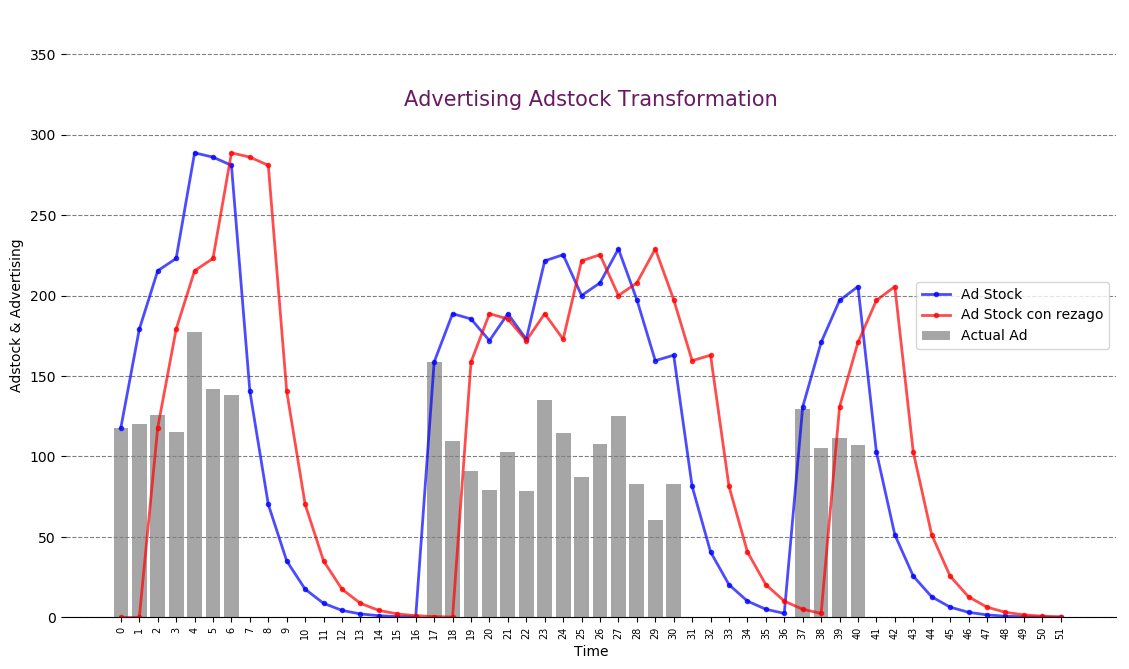

In [200]:
fig, ax = plt.subplots(figsize=(15,8), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')

ax.set_ylim([0, 1.3*max(adstocked_advertising)])

bar = ax.bar(np.arange(len(advertising)), advertising, width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(advertising)), lag_log_adstocked_advertising_0, 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')
line2 = ax.plot(np.arange(len(advertising)), lag_log_adstocked_advertising_2, 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='red', alpha=0.7, label='Ad Stock con rezago')

ax.set_xlabel('Time')
ax.set_ylabel('Adstock & Advertising')
#ax.set_title('advertising adstock transformation')

ax.annotate("Advertising Adstock Transformation", (np.mean(np.arange(len(advertising))), 315),
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=15, color='#681963')
ax.set_xticks(np.arange(len(advertising)))
ax.set_xticklabels(labels=np.arange(len(advertising)), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

In [180]:
lag_log_adstocked_advertising_ = lag_log_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=2)

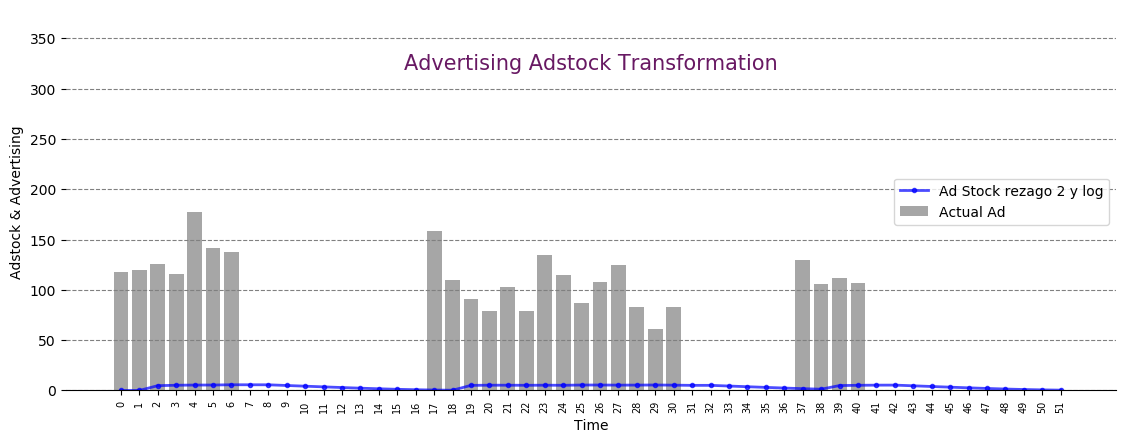

In [182]:
fig, ax = plt.subplots(figsize=(15,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')

ax.set_ylim([0, 1.3*max(adstocked_advertising)])

bar = ax.bar(np.arange(len(advertising)), advertising, width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(advertising)), lag_log_adstocked_advertising_ , 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock rezago 2 y log')


ax.set_xlabel('Time')
ax.set_ylabel('Adstock & Advertising')
#ax.set_title('advertising adstock transformation')

ax.annotate("Advertising Adstock Transformation", (np.mean(np.arange(len(advertising))), 315),
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=15, color='#681963')
ax.set_xticks(np.arange(len(advertising)))
ax.set_xticklabels(labels=np.arange(len(advertising)), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

In [203]:
0.9**(24)

0.07976644307687256

In [215]:
lag_log_adstocked_advertising_log15 = lag_log_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=2, log_base=1.5)
lag_log_adstocked_advertising_log11 = lag_log_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=2, log_base=1.1)
lag_log_adstocked_advertising_log105 = lag_log_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=2, log_base=1.05)

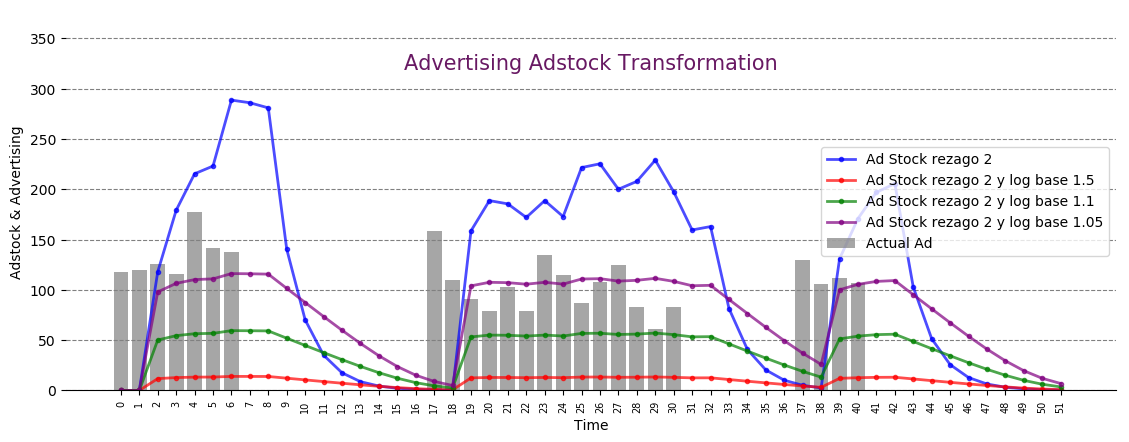

In [245]:
fig, ax = plt.subplots(figsize=(15,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')

ax.set_ylim([0, 1.3*max(adstocked_advertising)])

bar = ax.bar(np.arange(len(advertising)), advertising, width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(advertising)), lag_log_adstocked_advertising_2 , 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock rezago 2 ')
line2 = ax.plot(np.arange(len(advertising)), lag_log_adstocked_advertising_log15 , 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='red', alpha=0.7, label='Ad Stock rezago 2 y log base 1.5')
line3 = ax.plot(np.arange(len(advertising)), lag_log_adstocked_advertising_log11 , 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='green', alpha=0.7, label='Ad Stock rezago 2 y log base 1.1')
line4 = ax.plot(np.arange(len(advertising)), lag_log_adstocked_advertising_log105 , 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='purple', alpha=0.7, label='Ad Stock rezago 2 y log base 1.05')

ax.set_xlabel('Time')
ax.set_ylabel('Adstock & Advertising')
#ax.set_title('advertising adstock transformation')

ax.annotate("Advertising Adstock Transformation", (np.mean(np.arange(len(advertising))), 315),
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=15, color='#681963')
ax.set_xticks(np.arange(len(advertising)))
ax.set_xticklabels(labels=np.arange(len(advertising)), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  

plt.show()

In [230]:
lag_atan_adstocked_advertising_scale1 = lag_atan_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=2, atan_scale=1)
lag_atan_adstocked_advertising_scale10 = lag_atan_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=2, atan_scale=10)
lag_atan_adstocked_advertising_scale100 = lag_atan_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=2, atan_scale=100)
lag_atan_adstocked_advertising_scale1000 = lag_atan_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=2, atan_scale=1000)

In [238]:
advertising_2 = [i/100 for i in advertising] 

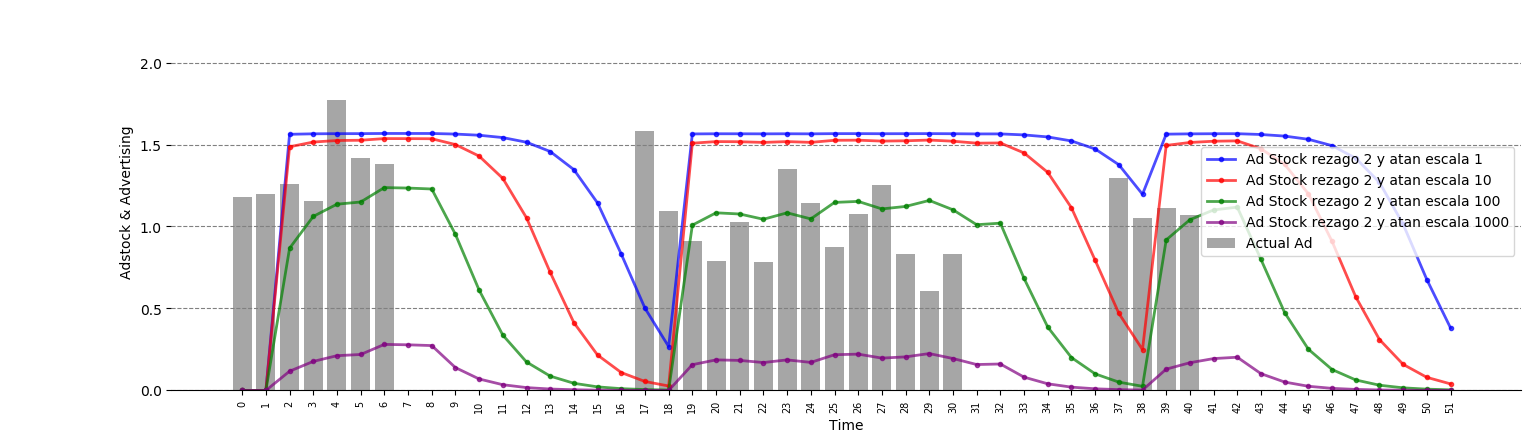

In [279]:
fig, ax = plt.subplots(figsize=(15,5), dpi=100)
plt.subplots_adjust(left=0, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')

ax.set_ylim([0, 1.3*max(advertising_2)])

bar = ax.bar(np.arange(len(advertising_2)), advertising_2, width=0.8, color='gray', alpha=0.7, label='Actual Ad')

#line = ax.plot(np.arange(len(advertising)), lag_log_adstocked_advertising_2 , 
#               marker='o', markersize=3, linestyle='-', linewidth=2, color='black', alpha=0.7, label='Ad Stock rezago 2 ')
line1 = ax.plot(np.arange(len(advertising)), lag_atan_adstocked_advertising_scale1 , 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock rezago 2 y atan escala 1')
line2 = ax.plot(np.arange(len(advertising)), lag_atan_adstocked_advertising_scale10 , 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='red', alpha=0.7, label='Ad Stock rezago 2 y atan escala 10')
line3 = ax.plot(np.arange(len(advertising)), lag_atan_adstocked_advertising_scale100 , 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='green', alpha=0.7, label='Ad Stock rezago 2 y atan escala 100')
line4 = ax.plot(np.arange(len(advertising)), lag_atan_adstocked_advertising_scale1000 , 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='purple', alpha=0.7, label='Ad Stock rezago 2 y atan escala 1000')

ax.set_xlabel('Time')
ax.set_ylabel('Adstock & Advertising')
#ax.set_title('advertising adstock transformation')

ax.annotate("Advertising Adstock Transformation", (np.mean(np.arange(len(advertising))), 315),
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=15, color='#681963')
ax.set_xticks(np.arange(len(advertising)))
ax.set_xticklabels(labels=np.arange(len(advertising)), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

In [275]:
lag_tanh_adstocked_advertising_scale1 = lag_tanh_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=2, tanh_scale=1)
lag_tanh_adstocked_advertising_scale10 = lag_tanh_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=2, tanh_scale=10)
lag_tanh_adstocked_advertising_scale100 = lag_tanh_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=2, tanh_scale=100)
lag_tanh_adstocked_advertising_scale1000 = lag_tanh_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=2, tanh_scale=1000)

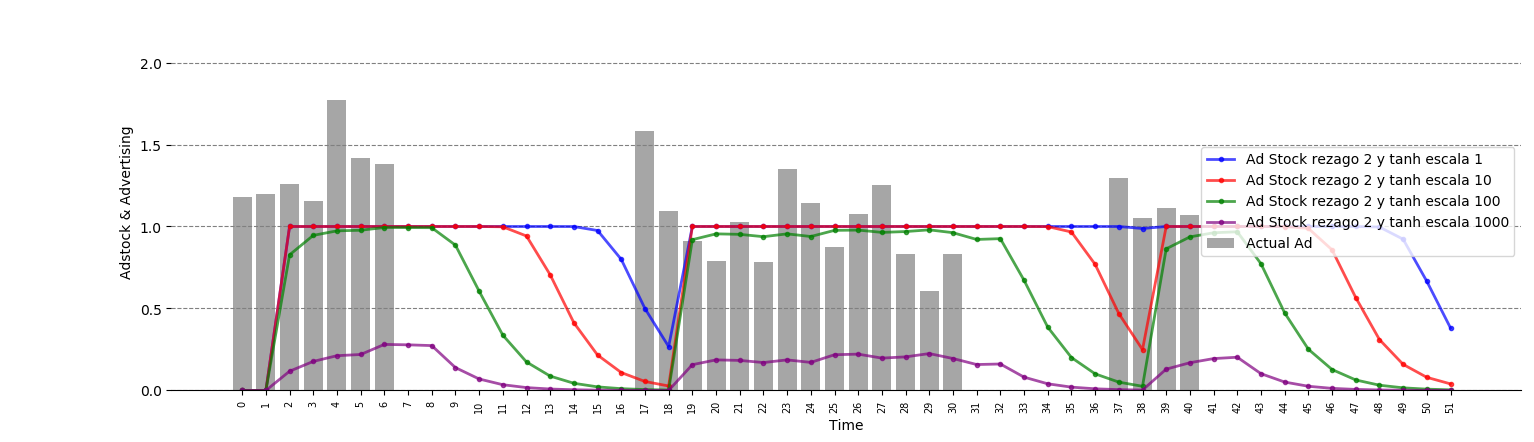

In [280]:
fig, ax = plt.subplots(figsize=(15,5), dpi=100)
plt.subplots_adjust(left=0, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')

ax.set_ylim([0, 1.3*max(advertising_2)])

bar = ax.bar(np.arange(len(advertising_2)), advertising_2, width=0.8, color='gray', alpha=0.7, label='Actual Ad')

#line = ax.plot(np.arange(len(advertising)), lag_log_adstocked_advertising_2 , 
#               marker='o', markersize=3, linestyle='-', linewidth=2, color='black', alpha=0.7, label='Ad Stock rezago 2 ')
line1 = ax.plot(np.arange(len(advertising)), lag_tanh_adstocked_advertising_scale1 , 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock rezago 2 y tanh escala 1')
line2 = ax.plot(np.arange(len(advertising)), lag_tanh_adstocked_advertising_scale10 , 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='red', alpha=0.7, label='Ad Stock rezago 2 y tanh escala 10')
line3 = ax.plot(np.arange(len(advertising)), lag_tanh_adstocked_advertising_scale100 , 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='green', alpha=0.7, label='Ad Stock rezago 2 y tanh escala 100')
line4 = ax.plot(np.arange(len(advertising)), lag_tanh_adstocked_advertising_scale1000 , 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='purple', alpha=0.7, label='Ad Stock rezago 2 y tanh escala 1000')

ax.set_xlabel('Time')
ax.set_ylabel('Adstock & Advertising')
#ax.set_title('advertising adstock transformation')

ax.annotate("Advertising Adstock Transformation", (np.mean(np.arange(len(advertising))), 315),
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=15, color='#681963')
ax.set_xticks(np.arange(len(advertising)))
ax.set_xticklabels(labels=np.arange(len(advertising)), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

In [260]:
lag_tanh_adstocked_advertising(adstock_rate=0.5, advertising=advertising, lag=2, atan_scale=0.1)

[0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999994092438,
 0.9999656274560119,
 0.9917428942101185,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999776,
 0.9999997880030967,
 0.9993490638253822]

In [250]:
log(2,10)

0.30102999566398114

In [251]:
log(2), log(1.5), log (1.05)

(0.6931471805599453, 0.4054651081081644, 0.04879016416943204)